In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from logistic_regression import LogisticRegressionGD
from extrapolation import *
from experiments import Experiment, RestartingExperiment

In [3]:
device = "cpu"

X = []
with open("../../../madelon_train.data") as f:
    for line in f:
        X.append([float(x) for x in line.split()])
X = np.array(X)
X /= X.max()
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
X = torch.tensor(X, device=device)
with open("../../../madelon_train.labels") as f:
    y = [int(x) for x in f]
y = torch.tensor(y, device=device)
X.shape, y.shape

(torch.Size([2000, 501]), torch.Size([2000]))

In [4]:
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## $\tau = 10^2$

In [5]:
model = LogisticRegressionGD(X_train, y_train, 1e2, device=device)

In [6]:
model.run_steps(50500)

In [7]:
len(model.log)

50501

In [8]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

### Without restarting

In [9]:
experiment = Experiment(model.log, model.obj, values=model.value_log)
k = 6

In [10]:
experiment.run_method("VLT", h_algorithm, k+1, method_kwargs={"k": k, "type": "t"})

In [11]:
experiment.run_method("VLU", h_algorithm, k+1, method_kwargs={"k": k, "type": "u"})

In [12]:
experiment.run_method("VLV", h_algorithm, k+2, method_kwargs={"k": k, "type": "v"})

In [13]:
experiment.run_method("SLT", e_algorithm, k+1, method_kwargs={"k": k, "type": "t"})

In [14]:
experiment.run_method("SLU", e_algorithm, k+1, method_kwargs={"k": k, "type": "u"})

In [15]:
experiment.run_method("SLV", e_algorithm, k+2, method_kwargs={"k": k, "type": "v"})

In [16]:
experiment.run_method("RRE+QR", RRE, k, method_kwargs={"qr": True})

In [17]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 2*k, method_kwargs={"k": k})

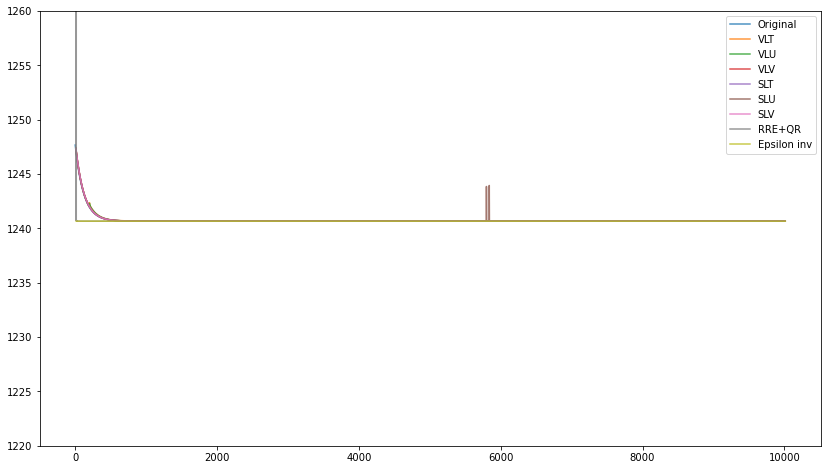

In [18]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=10000)
plt.ylim(1220, 1260)
plt.legend()

../../experiments.py:68: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.arange(n), np.log10(np.abs(np.array(self.values[:n]) - best)), label="Original", alpha=0.8)
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array

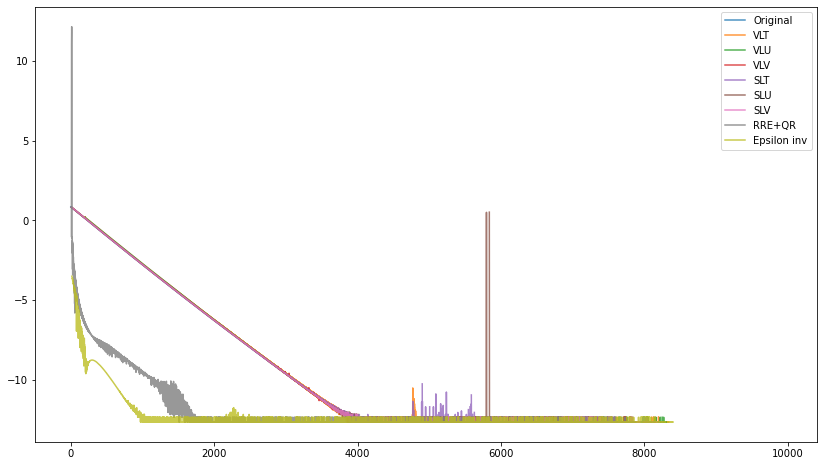

In [19]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=10000)
plt.legend()

In [20]:
df = experiment.value_df()
df.to_csv("results/madelon-levin:tau=1e2.csv")

### With restarting

In [21]:
experiment = RestartingExperiment(model)
k = 6

In [22]:
experiment.run_method("VLT", h_algorithm, k+1, 5000, method_kwargs={"k": k, "type": "t"})

In [23]:
experiment.run_method("VLU", h_algorithm, k+1, 5000, method_kwargs={"k": k, "type": "u"})

In [24]:
experiment.run_method("VLV", h_algorithm, k+2, 5000, method_kwargs={"k": k, "type": "v"})

In [25]:
experiment.run_method("SLT", e_algorithm, k+1, 5000, method_kwargs={"k": k, "type": "t"})

In [26]:
experiment.run_method("SLU", e_algorithm, k+1, 5000, method_kwargs={"k": k, "type": "u"})

In [27]:
experiment.run_method("SLV", e_algorithm, k+2, 5000, method_kwargs={"k": k, "type": "v"})

In [28]:
experiment.run_method("RRE+QR", RRE, k, 5000, method_kwargs={"qr": True})

In [29]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 2*k, 5000, method_kwargs={"k": k})

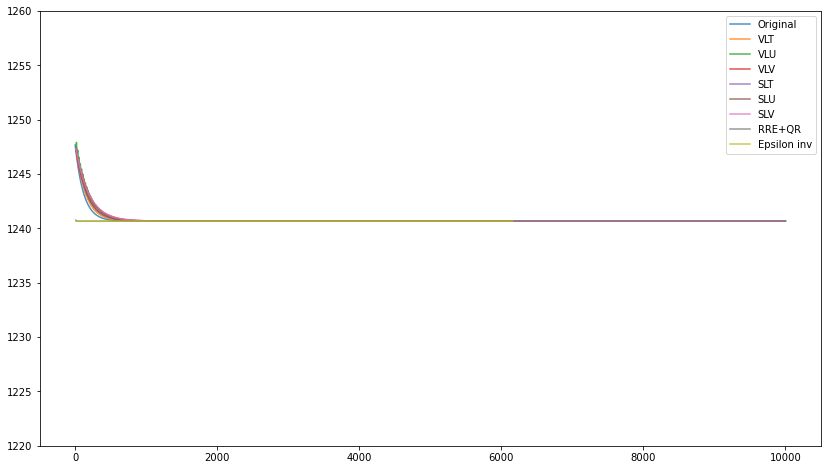

In [30]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=10000)
plt.ylim(1220, 1260)
plt.legend()

../../experiments.py:68: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.arange(n), np.log10(np.abs(np.array(self.values[:n]) - best)), label="Original", alpha=0.8)
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array

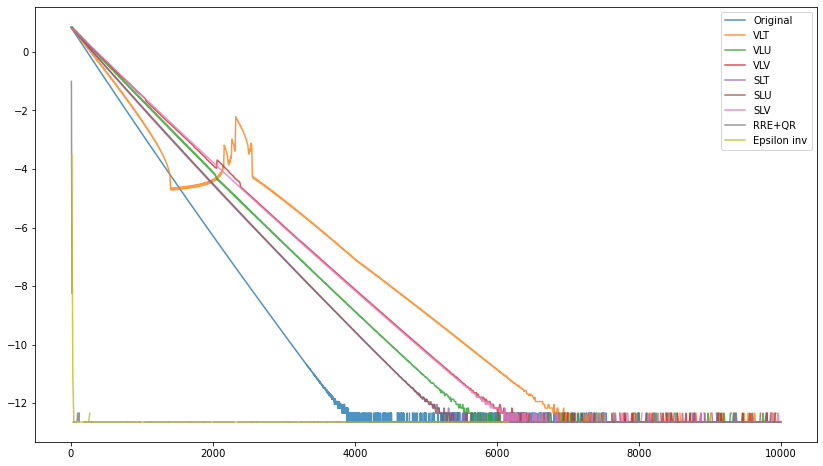

In [31]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=10000)
plt.legend()

In [32]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

In [33]:
df = experiment.value_df()
df.to_csv("results/madelon-levin-restarts:tau=1e2.csv")

## $\tau = 10^{-3}$

In [34]:
model = LogisticRegressionGD(X_train, y_train, 1e-3, device=device)

In [35]:
model.fit(1e-8, max_iter=100500)

In [36]:
len(model.log)

100501

In [37]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

### Without restarting

In [38]:
experiment = Experiment(model.log, model.obj, values=model.value_log)
k = 6

In [39]:
experiment.run_method("VLT", h_algorithm, k+1, method_kwargs={"k": k, "type": "t"})

In [40]:
experiment.run_method("VLU", h_algorithm, k+1, method_kwargs={"k": k, "type": "u"})

In [41]:
experiment.run_method("VLV", h_algorithm, k+2, method_kwargs={"k": k, "type": "v"})

In [42]:
experiment.run_method("SLT", e_algorithm, k+1, method_kwargs={"k": k, "type": "t"})

In [43]:
experiment.run_method("SLU", e_algorithm, k+1, method_kwargs={"k": k, "type": "u"})

In [44]:
experiment.run_method("SLV", e_algorithm, k+2, method_kwargs={"k": k, "type": "v"})

In [45]:
experiment.run_method("RRE+QR", RRE, k, method_kwargs={"qr": True})

In [46]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 2*k, method_kwargs={"k": k})

In [47]:
experiment.run_method("MMPE", MMPE, k)

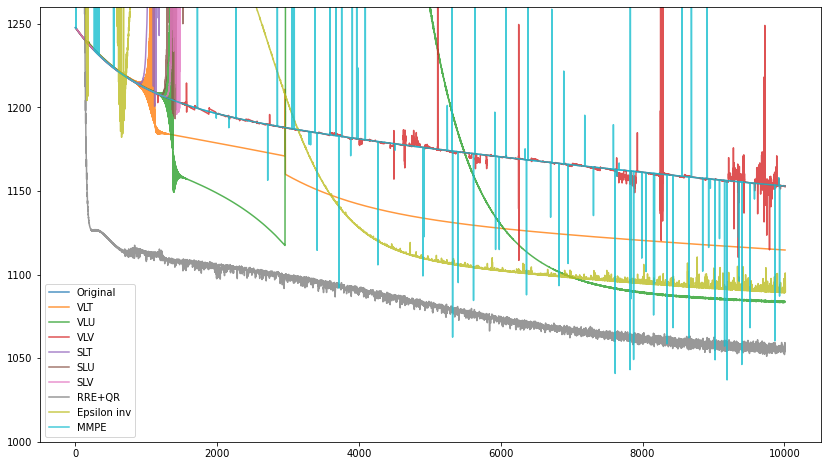

In [51]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=10000)
plt.ylim(1000, 1260)
plt.legend()

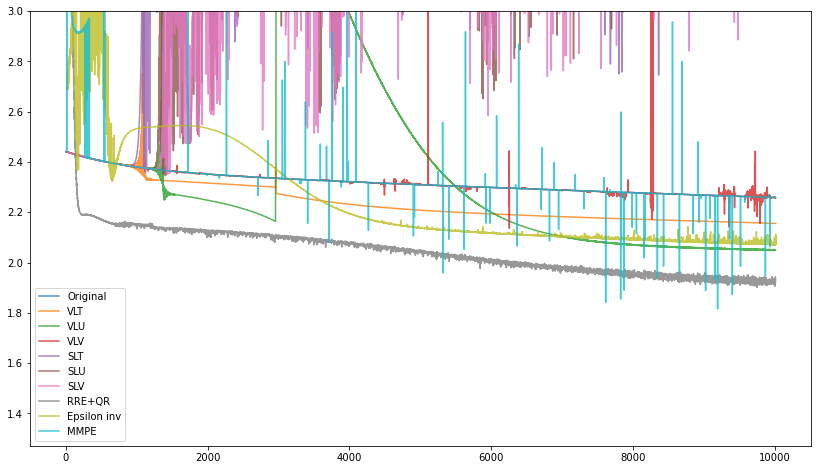

In [52]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=10000)
plt.ylim(None, 3)
plt.legend()

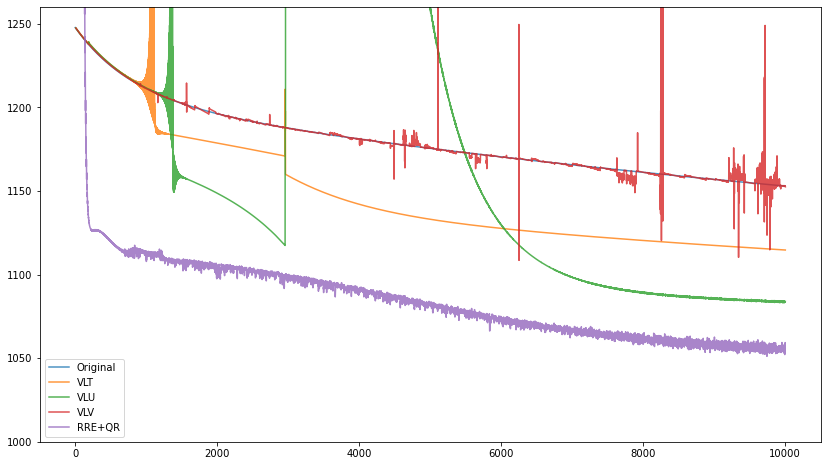

In [53]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=10000, methods=["VLT", "VLU", "VLV", "RRE+QR"])
plt.ylim(1000, 1260)
plt.legend()

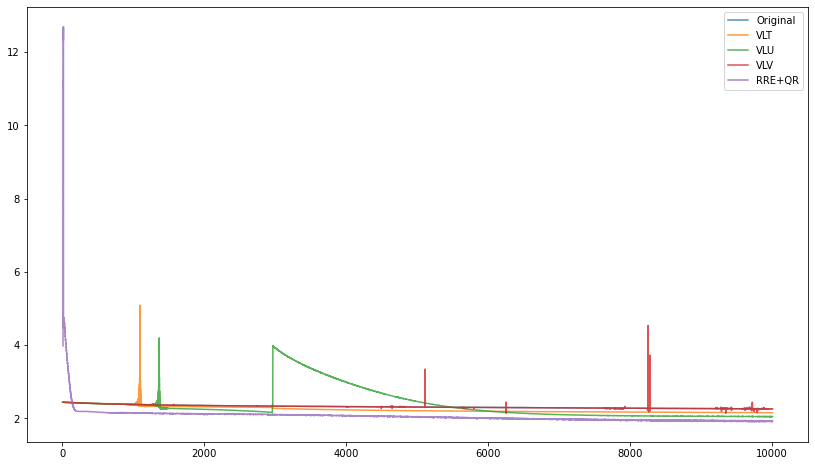

In [54]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=10000, methods=["VLT", "VLU", "VLV", "RRE+QR"])
plt.legend()

In [55]:
df = experiment.value_df()
df.to_csv("results/madelon-levin:tau=1e-3.csv")

### With restarting

In [67]:
experiment = RestartingExperiment(model)
k = 6

In [68]:
experiment.run_method("VLT", h_algorithm, k+1, 5000, method_kwargs={"k": k, "type": "t"})

In [69]:
experiment.run_method("VLU", h_algorithm, k+1, 5000, method_kwargs={"k": k, "type": "u"})

In [70]:
experiment.run_method("VLV", h_algorithm, k+2, 5000, method_kwargs={"k": k, "type": "v"})

In [71]:
experiment.run_method("SLT", e_algorithm, k+1, 5000, method_kwargs={"k": k, "type": "t"})

In [72]:
experiment.run_method("SLU", e_algorithm, k+1, 5000, method_kwargs={"k": k, "type": "u"})

In [73]:
experiment.run_method("SLV", e_algorithm, k+2, 5000, method_kwargs={"k": k, "type": "v"})

In [74]:
experiment.run_method("RRE+QR", RRE, k, 5000, method_kwargs={"qr": True})

In [75]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 2*k, 5000, method_kwargs={"k": k})

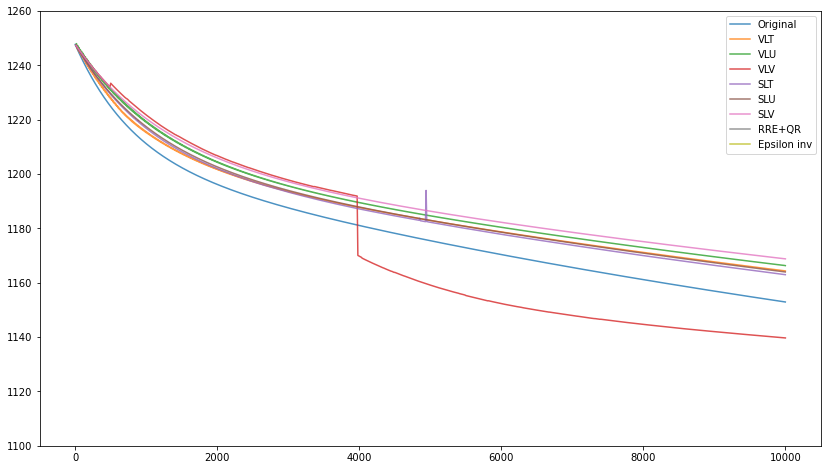

In [81]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=10000)
plt.ylim(1100, 1260)
plt.legend()

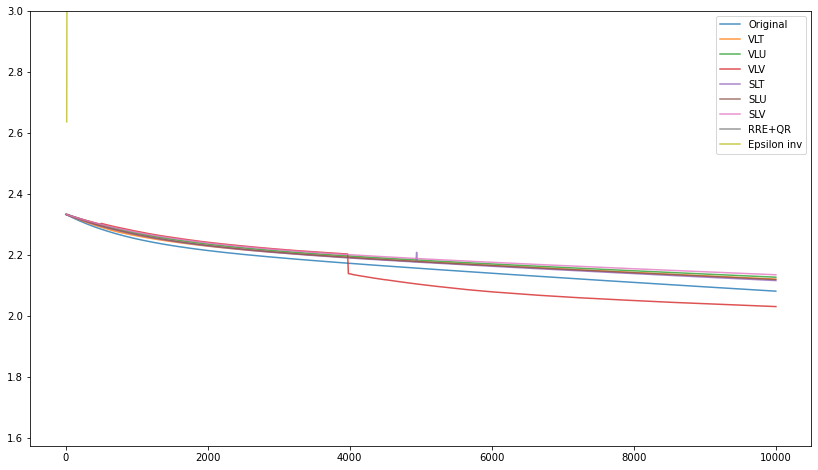

In [77]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=10000)
plt.ylim(None, 3)
plt.legend()

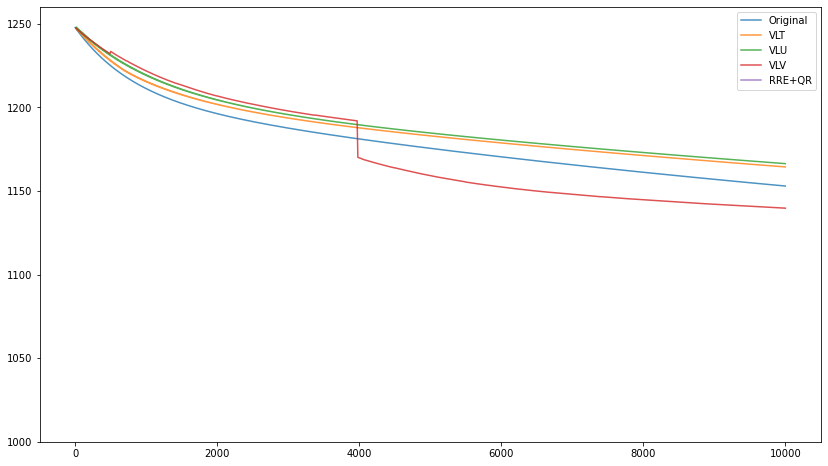

In [78]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=10000, methods=["VLT", "VLU", "VLV", "RRE+QR"])
plt.ylim(1000, 1260)
plt.legend()

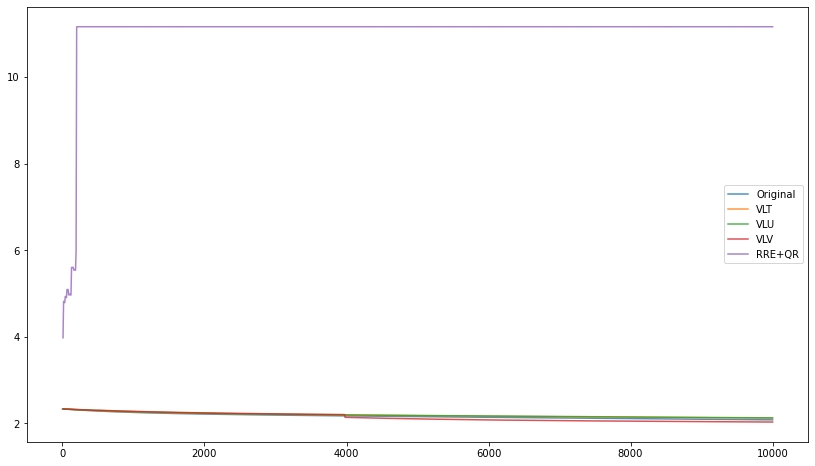

In [79]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=10000, methods=["VLT", "VLU", "VLV", "RRE+QR"])
plt.legend()

In [80]:
df = experiment.value_df()
df.to_csv("results/madelon-levin-restarts:tau=1e-3.csv")